In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from features import demo_name_mapping, replace_values_with_nan

In [13]:
df = pd.read_sas('P_DEMO.XPT')
df.head()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00


Feature Engineering


In [14]:
##Refusal values - Demo
column_na_7_9 = ['Education_20+']
column_na_77_99 = ['Birth_Country','LengthStay_US','Marital_Status']

In [15]:


# Rename the columns using the imported column_name_mapping
df.rename(columns=demo_name_mapping, inplace=True)

# Display only columns with the new names
df_adult = df[df['Age_Years'] >= 20].filter(demo_name_mapping.values(), axis=1)


for columns_to_replace, values_to_replace in [(column_na_7_9, [7,9]),
                                              (column_na_77_99, [77,99])]:
    df_adult = replace_values_with_nan(df_adult, columns_to_replace, values_to_replace)

df_adult.head()


,SEQN,Gender,Interview_Status,Age_Years,Race,Birth_Country,LengthStay_US,Education_20+,Marital_Status,RatioIncome_Poverty
3,109266.0,2.0,2.0,29.0,6.0,2.0,2.0,5.0,3.0,5.00
4,109267.0,2.0,1.0,21.0,2.0,2.0,3.0,4.0,3.0,5.00
8,109271.0,1.0,2.0,49.0,3.0,1.0,NaN,2.0,3.0,NaN
10,109273.0,1.0,2.0,36.0,3.0,1.0,NaN,4.0,3.0,0.83
11,109274.0,1.0,2.0,68.0,7.0,1.0,NaN,4.0,3.0,1.20


In [16]:
column_numerical= ['Age_Years', 'RatioIncome_Poverty']
df_adult[column_numerical].describe()

,Age_Years,RatioIncome_Poverty
count,9232.000000,7.828000e+03
mean,51.144931,2.597786e+00
std,17.686659,1.626501e+00
min,20.000000,5.397605e-79
25%,36.000000,1.190000e+00
50%,52.000000,2.210000e+00
75%,65.000000,4.202500e+00
max,80.000000,5.000000e+00


In [17]:
print(df_adult.dtypes)
format_to_categorical= ['Gender', 'Interview_Status', 'Race', 'Birth_Country', 'Education_20+', 'Marital_Status' ]



SEQN                   float64
Gender                 float64
Interview_Status       float64
Age_Years              float64
Race                   float64
Birth_Country          float64
LengthStay_US          float64
Education_20+          float64
Marital_Status         float64
RatioIncome_Poverty    float64
dtype: object


In [18]:
df_adult[format_to_categorical]=df_adult[format_to_categorical].astype('category')
print(df_adult.dtypes)

SEQN                    float64
Gender                 category
Interview_Status       category
Age_Years               float64
Race                   category
Birth_Country          category
LengthStay_US           float64
Education_20+          category
Marital_Status         category
RatioIncome_Poverty     float64
dtype: object


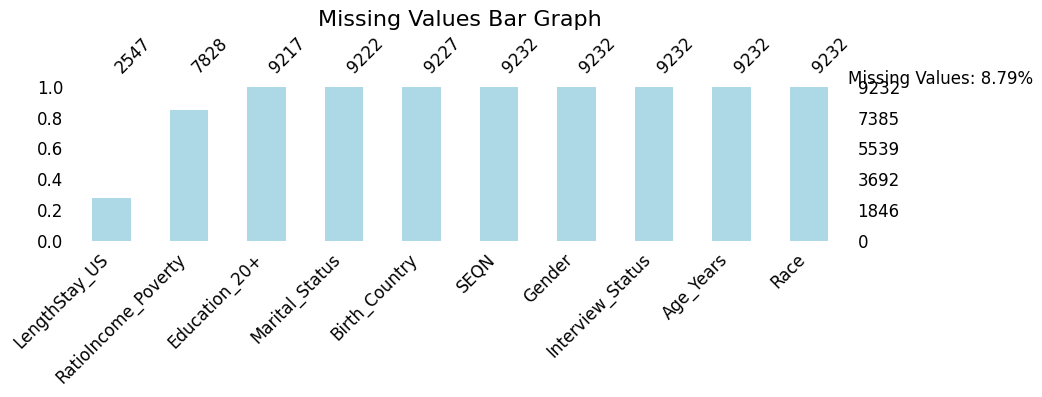

In [19]:
import missingno as msno


# Assuming df_adult is your DataFrame
msno.bar(df_adult, figsize=(10, 2), color='lightblue', fontsize=12, sort='ascending')  

# Calculate and display the percentage of missing values
missing_percentage = df_adult.isnull().mean() * 100
plt.text(1, 1.02, f'Missing Values: {missing_percentage.mean():.2f}%', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.title('Missing Values Bar Graph', fontsize=16)
plt.show()


In [20]:
print(df_adult.isnull().sum().sort_values(ascending=False))

LengthStay_US          6685
RatioIncome_Poverty    1404
Education_20+            15
Marital_Status           10
Birth_Country             5
SEQN                      0
Gender                    0
Interview_Status          0
Age_Years                 0
Race                      0
dtype: int64


In [21]:
df_missing_values = df_adult[df_adult[['Age_Years','Education_20+', 'Marital_Status']].isnull().any(axis=1)]
df_missing_values

,SEQN,Gender,Interview_Status,Age_Years,Race,Birth_Country,LengthStay_US,Education_20+,Marital_Status,RatioIncome_Poverty
197,109460.0,2.0,1.0,80.0,3.0,1.0,NaN,NaN,1.0,NaN
288,109551.0,1.0,2.0,65.0,7.0,1.0,NaN,1.0,NaN,NaN
392,109655.0,2.0,2.0,42.0,1.0,2.0,2.0,NaN,1.0,NaN
2285,111548.0,1.0,2.0,79.0,7.0,1.0,NaN,1.0,NaN,NaN
3134,112397.0,1.0,1.0,26.0,2.0,2.0,2.0,NaN,3.0,0.66
3899,113162.0,2.0,2.0,69.0,4.0,1.0,NaN,NaN,NaN,NaN
3939,113202.0,2.0,2.0,66.0,4.0,2.0,1.0,2.0,NaN,5.00
5534,114797.0,1.0,2.0,78.0,2.0,2.0,4.0,NaN,3.0,2.31
5575,114838.0,1.0,2.0,63.0,1.0,1.0,NaN,NaN,3.0,NaN
6152,115415.0,2.0,1.0,42.0,4.0,1.0,NaN,4.0,NaN,NaN


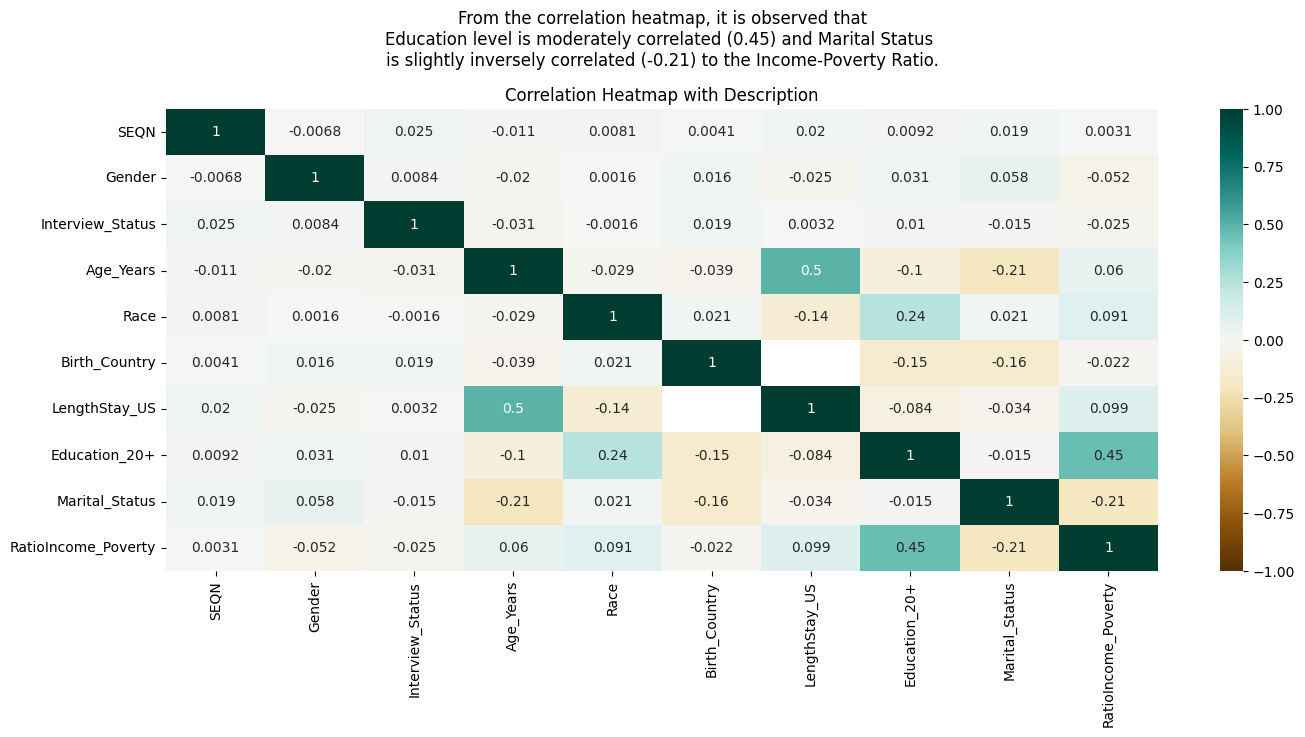

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_adult.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
description_text = (
    "From the correlation heatmap, it is observed that\n"
    "Education level is moderately correlated (0.45) and Marital Status \n"
    "is slightly inversely correlated (-0.21) to the Income-Poverty Ratio."
)


plt.text(0.5, 1.15, description_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.title('Correlation Heatmap with Description')
plt.show()
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Steps to dealing with missing or null values:

1. Drop columns with a lot of missing values 
2. Drop the few rows in each column
3. Impute the missing values with various methods such as (mean, median, mode) imputation or linear regression imputation

In [23]:
#Dealing with missing values


df_missing_queue = df_adult[df_adult['RatioIncome_Poverty'].isnull()]
df_missing = df_missing_queue.dropna(subset=[ 'Age_Years','Education_20+', 'Marital_Status'])
print(df_missing)
df_not_missing = df_adult.dropna(subset=['RatioIncome_Poverty', 'Age_Years','Education_20+', 'Marital_Status'])




           SEQN Gender Interview_Status  Age_Years Race Birth_Country  \
8      109271.0    1.0              2.0       49.0  3.0           1.0   
21     109284.0    2.0              2.0       44.0  1.0           2.0   
28     109291.0    2.0              2.0       42.0  6.0           1.0   
34     109297.0    2.0              2.0       30.0  6.0           1.0   
54     109317.0    2.0              2.0       28.0  4.0           1.0   
...         ...    ...              ...        ...  ...           ...   
15533  124796.0    2.0              2.0       61.0  4.0           1.0   
15542  124805.0    2.0              2.0       66.0  4.0           2.0   
15545  124808.0    2.0              1.0       26.0  3.0           1.0   
15550  124813.0    2.0              2.0       43.0  4.0           2.0   
15559  124822.0    1.0              2.0       74.0  2.0           2.0   

       LengthStay_US Education_20+ Marital_Status  RatioIncome_Poverty  
8                NaN           2.0            3.0 

In [24]:
from sklearn.preprocessing import StandardScaler

df_not_missing_x= df_not_missing[['Age_Years','Education_20+', 'Marital_Status']]
df_not_missing_y= df_not_missing[['RatioIncome_Poverty']]


df_missing_x= df_missing[['Age_Years','Education_20+', 'Marital_Status']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_not_missing_x)
X_test_scaled = scaler.transform(df_missing_x)

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, df_not_missing_y)

LinearRegression()

In [26]:
# Predict missing values
predicted_values = model.predict(X_test_scaled)

# Fill in missing values in the original DataFrame

df_missing.loc[df_missing_x.index, 'RatioIncome_Poverty'] = predicted_values
# Display the DataFrame with imputed values

print(df_missing.isnull().sum().sort_values(ascending=False))

LengthStay_US          908
Birth_Country            2
SEQN                     0
Gender                   0
Interview_Status         0
Age_Years                0
Race                     0
Education_20+            0
Marital_Status           0
RatioIncome_Poverty      0
dtype: int64


In [27]:
df_adult = pd.concat([df_missing, df_not_missing], axis=0, ignore_index=False)

In [28]:
df_adult.drop(columns='LengthStay_US')


,SEQN,Gender,Interview_Status,Age_Years,Race,Birth_Country,Education_20+,Marital_Status,RatioIncome_Poverty
8,109271.0,1.0,2.0,49.0,3.0,1.0,2.0,3.0,1.024266
21,109284.0,2.0,2.0,44.0,1.0,2.0,2.0,1.0,1.781878
28,109291.0,2.0,2.0,42.0,6.0,1.0,5.0,1.0,3.681702
34,109297.0,2.0,2.0,30.0,6.0,1.0,4.0,3.0,2.180984
54,109317.0,2.0,2.0,28.0,4.0,1.0,4.0,3.0,2.168550
...,...,...,...,...,...,...,...,...,...
15551,124814.0,1.0,2.0,64.0,4.0,1.0,3.0,2.0,2.000000
15552,124815.0,1.0,2.0,52.0,4.0,1.0,4.0,2.0,5.000000
15554,124817.0,2.0,2.0,67.0,1.0,2.0,2.0,1.0,2.190000
15555,124818.0,1.0,2.0,40.0,4.0,1.0,5.0,1.0,3.820000


Exploratory Data Analysis

1. Demographics

C:\Users\User\AppData\Local\Temp\ipykernel_5756\2970538509.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_adult.groupby(['Age_Years', 'Education_20+'])['RatioIncome_Poverty'].mean().reset_index()


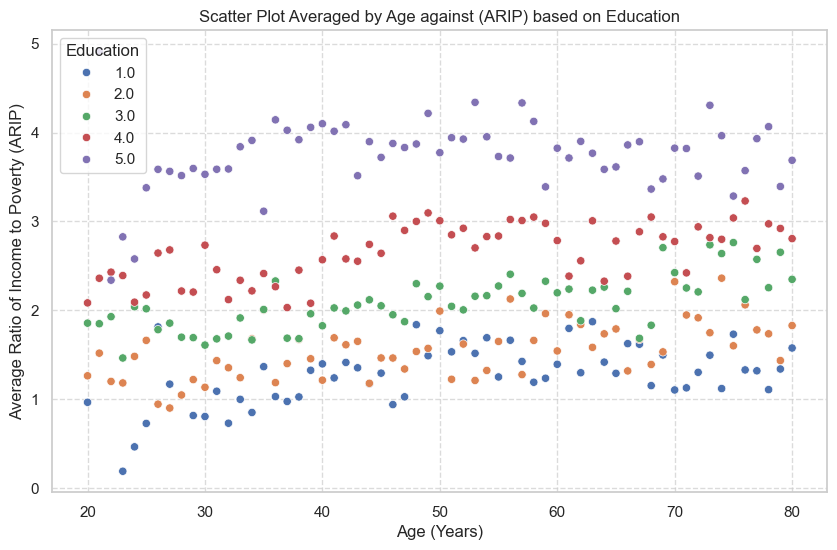

In [29]:

# Assuming df_adult is your DataFrame

# Group by 'Age_Years' and 'Education_20+', calculate the mean for 'RatioIncome_Poverty'
grouped_data = df_adult.groupby(['Age_Years', 'Education_20+'])['RatioIncome_Poverty'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with color grouping
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age_Years', y='RatioIncome_Poverty', hue='Education_20+', data=grouped_data, palette='deep', marker='o')

# Set axis labels and title
plt.xlabel('Age (Years)')
plt.ylabel('Average Ratio of Income to Poverty (ARIP)')
plt.title('Scatter Plot Averaged by Age against (ARIP) based on Education')

# Add legend
plt.legend(title='Education')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [30]:
df_adult_label = df_adult.copy()

marital_status_mapping = {1: 'Married/Partner', 2: 'Widow/Divorce', 3: 'Single'}
gender_mapping = {1: 'Male', 2: 'Female'}
race_mapping = {1: 'Mexican American', 2: 'Other Hispanic', 3: 'White', 4: 'Black', 6: 'Asian', 7: 'Other Race'}
birth_mapping = {1: 'USA', 2: 'Others'}

df_adult_label.replace({
    'Marital_Status': marital_status_mapping,
    'Gender': gender_mapping,
    'Race': race_mapping,
    'Birth_Country': birth_mapping
}, inplace=True)



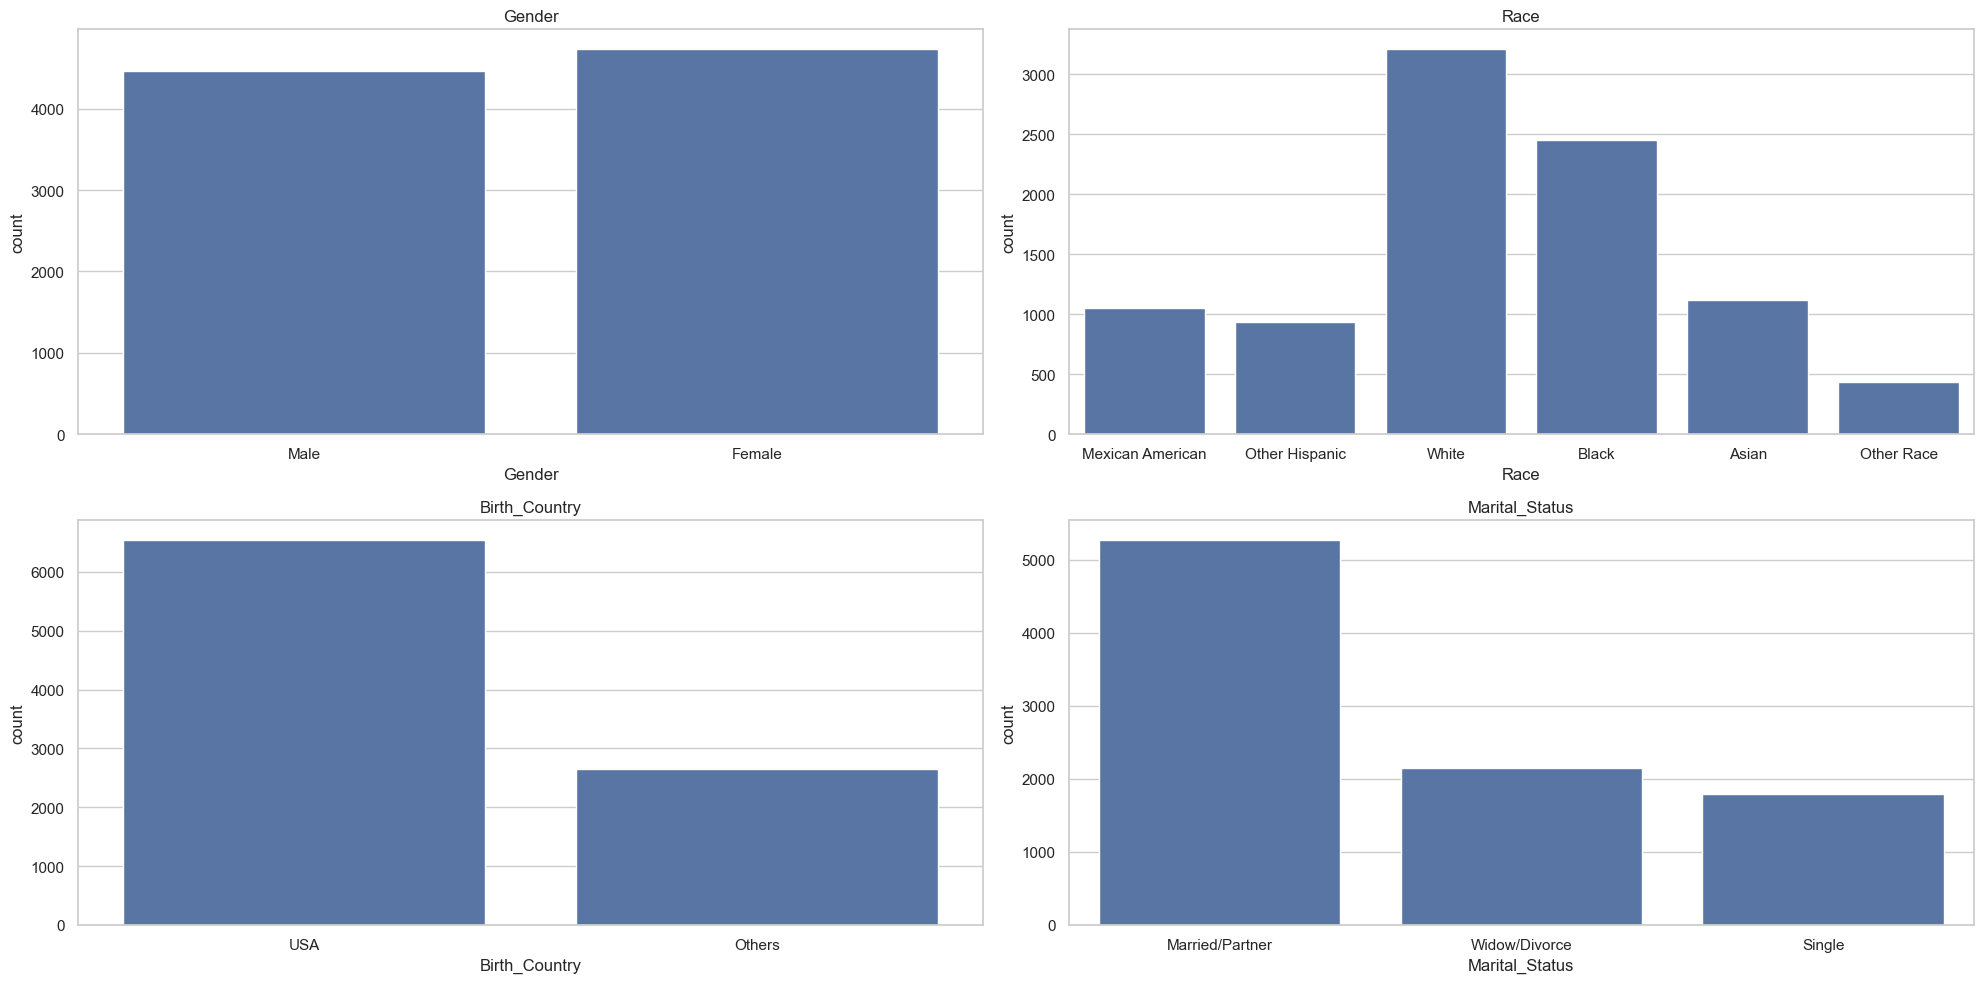

In [31]:
selected_columns = ['Gender', 'Race', 'Birth_Country', 'Marital_Status']

row_num = 2
col_num = 2

fig, axes = plt.subplots(row_num, col_num, squeeze=False, figsize=(20, 10))

row_n = -1
for ix, col in enumerate(selected_columns):
    col_n = ix % col_num
    if col_n == 0:
        row_n = row_n + 1
    sns.countplot(x=col, data=df_adult_label, ax=axes[row_n, col_n])
    axes[row_n, col_n].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [32]:
total_rows = df_adult.shape[0]

print("Total rows in the DataFrame:", total_rows)

print(df_adult.isnull().sum().sort_values(ascending=False))

Total rows in the DataFrame: 9210
LengthStay_US          6672
Birth_Country             3
SEQN                      0
Gender                    0
Interview_Status          0
Age_Years                 0
Race                      0
Education_20+             0
Marital_Status            0
RatioIncome_Poverty       0
dtype: int64


In [ ]:
csv_filename = 'demo_clean.pkl'
df_adult.to_pickle(csv_filename)

In [ ]:
df1 = pd.read_pickle(csv_filename)
df1.head()

In [ ]:
df1.dtypes